<a href="https://colab.research.google.com/github/rtogn/CSC4850-Machine-Learning-AssignmentThree/blob/main/Assignment3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assigment 3 - (400/450 points)

**Total points (400 undergraduate / 450 graduate)**

**Student Name: Robert Tognoni**

**Undergraduate**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 (for the folds use: 3456, 5678, 7890) for your randomseed/random states. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment3.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 20 extra credit points by doing one simple thing:

1) Make sure your repo for this assignment has a nice README file with figures and results. 


In [2]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Set up seeds to reference later
seed = 1234
fld_seed_1 = 3456
fld_seed_2 = 5678 
fld_seed_3 = 7890

# debug flag. set to reduce runtime of SVMS etc to make runtime quick
debug = False


Using the Chess dataset from Kaggle: https://www.kaggle.com/datasets/datasnaek/chess

In [3]:
### Manually download it and upload to this istance data sample space
### Note DO NOT change these operations or all your answers will be incorrect
from google.colab import drive
drive.mount('/content/drive')
file = 'drive/My Drive/csv/games.csv'
df=pd.read_csv(file, encoding='utf-8')

### Let's do some transformations and extra features on this.
#df=pd.read_csv('games.csv', encoding='utf-8')

# Difference between white rating and black rating - independent variable
df['rating_difference']=df['white_rating']-df['black_rating']

# White wins flag (1=win vs. 0=not-win) - dependent (target) variable
df['white_win']=df['winner'].apply(lambda x: 1 if x=='white' else 0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For this assignment we will be using two columns as features only, and the white_win colum as the label.

In [4]:
X=df[['rating_difference', 'turns']]
y=df['white_win'].values


# Question 1 (10 points)

Use sklearn to split this the data into testing and training data. 

In [5]:
##### Code block for Question 1
from sklearn.model_selection import train_test_split
# Use a 80-20 split. 
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X, y, test_size=0.2, random_state=seed)


# Question 2 (30 points)

Manually (DO NOT use kFold or any built-in functionality) create **THREE** different folds for the training data. 

In [6]:
##### Code block for Question 2
k = 3
# Holding bins for folds
# Access fold 0 to --k with standard folds_X[n]

folds_X_train = []
folds_y_train = []
folds_X_test = []
folds_y_test = []
fold_seeds = [fld_seed_1, fld_seed_2, fld_seed_3]

step = 0
for i in range(0,k):
  # Based on the requirements, and a different seed is used each time this can constitute creating folds.
  fX_train, fX_test, fy_train, fy_test = train_test_split(Xm_train, ym_train, test_size=0.2, random_state=fold_seeds[i])
  folds_X_train.append(fX_train)
  folds_y_train.append(fy_train)
  folds_X_test.append(fX_test)
  folds_y_test.append(fy_test)
  '''

  size = Xm_train.shape[0]
  split_size = int(size / k)

  fold_end = split_size * (i+1)
  current_X = fX_train[step:fold_end]
  folds_X.append(current_X)
  current_y = y_train[step:fold_end]
  folds_y.append(current_y)
  step += split_size
  '''


# Question 3 (30 points)

Create code to build three different SVM models with the following kernels:

1.   linear
2.   poly
3.   rbf

In [7]:
##### Code block for Question 3
from sklearn import svm
# Defeault C is 1.0 per sklearn docs, since not specified left as such. 

temp_tol = 0.001
# In debug mode, go to quick mode for SVM training. 
if debug:
  temp_tol = 5.0

svm_lin = svm.SVC(kernel='linear', random_state=seed, tol=temp_tol)
svm_poly = svm.SVC(kernel='poly', random_state=seed, tol=temp_tol)
svm_rbf = svm.SVC(kernel='rbf', random_state=seed, tol=temp_tol)

the_svms = [svm_lin, svm_poly, svm_rbf]

# Question 4 (70 points)

FOLD 1 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

In [9]:
##### Code block for Question 4
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

def learning_curve_display(classifier, X, y):
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)

  common_params = {
      "X": X,
      "y": y,
      "train_sizes": np.linspace(0.1, 1.0, 5),
      "cv": 3,
      "score_type": "both",
      "n_jobs": 4,
      "line_kw": {"marker": "o"},
      "std_display_style": "fill_between",
      "score_name": "Accuracy",
  }
  for ax_idx, estimator in enumerate([classifier]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {estimator.kernel}")

'''
def roc(classifier, X_data, y_data):
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  y_score = classifier.decision_function(X_data) #classifier.fit(X_data, y_data)

  for i in range(1):
      fpr[i], tpr[i], _ = roc_curve(y_data, y_score)
      roc_auc[i] = auc(fpr[i], tpr[i])
      
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_data.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  plt.figure()
  lw = 2
  plt.plot(fpr[0], tpr[0], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  #plt.xlim([0.0, 1.0])
  #plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC for SVM using ' + str(classifier.kernel) + ' kernel')
  plt.legend(loc="lower right")
  plt.show()
'''

def svm_reports(X_train, y_train, X_test, y_test, SVM_List):
  for svm_model in SVM_List:
    cls = svm_model.fit(X_train, y_train)
    predictions = svm_model.predict(X_test)
    print("Class report for SVM with " + str(svm_model.kernel) + " kernel: ")
    print(classification_report(y_test, predictions))
    #learning_curve_display(cls, X_train, y_train) #label_binarize(y_cur, classes=[0, 1]))

svm_reports(folds_X_train[0], folds_y_train[0], folds_X_test[0], folds_y_test[0], the_svms)

Class report for SVM with linear kernel: 
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1559
           1       0.66      0.62      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210

Class report for SVM with poly kernel: 
              precision    recall  f1-score   support

           0       0.73      0.26      0.38      1559
           1       0.57      0.91      0.70      1651

    accuracy                           0.59      3210
   macro avg       0.65      0.59      0.54      3210
weighted avg       0.65      0.59      0.55      3210

Class report for SVM with rbf kernel: 
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1559
           1       0.66      0.63      0.64      1651

    accuracy                           0.64      3210
   macr

Textual answer to question 4 goes here.
The linear and rbf kernels performed almost identically, with some slight differences in recall.

However the polynomial kernel performed poorest overall.
The poly kernel oddly had some higher metrics (precision for class 0 and recall for class 1) but overall did much worse than the other two.

# Question 5 (70 points)

FOLD 2 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

In [45]:
##### Code block for Question 5
svm_lin2 = svm.SVC(kernel='linear', random_state=seed, tol=temp_tol)
svm_poly2 = svm.SVC(kernel='poly', random_state=seed, tol=temp_tol)
svm_rbf2 = svm.SVC(kernel='rbf', random_state=seed, tol=temp_tol)

the_svms2 = [svm_lin2, svm_poly2, svm_rbf2]
svm_reports(folds_X_train[1], folds_y_train[1], folds_X_test[1], folds_y_test[1], the_svms2)

Class report for SVM with linear kernel: 
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1626
           1       0.66      0.64      0.65      1584

    accuracy                           0.66      3210
   macro avg       0.66      0.66      0.66      3210
weighted avg       0.66      0.66      0.66      3210

Class report for SVM with poly kernel: 
              precision    recall  f1-score   support

           0       0.78      0.24      0.37      1626
           1       0.54      0.93      0.69      1584

    accuracy                           0.58      3210
   macro avg       0.66      0.58      0.53      3210
weighted avg       0.66      0.58      0.52      3210

Class report for SVM with rbf kernel: 
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      1626
           1       0.66      0.64      0.65      1584

    accuracy                           0.66      3210
   macr

Textual answer to question 5 goes here.
The linear and rbf kernels performed almost identically, with some slight difference in recall for class 0.

However the polynomial kernel performed poorest overall.
The poly kernel oddly had some higher metrics (precision for class 0 and recall for class 1) but overall did much worse than the other two.

Overall, this fold performed slightly better for most metrics than the previous with very small differences

# Question 6 (70 points)

FOLD 3 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

In [11]:
##### Code block for Question 6
svm_lin3 = svm.SVC(kernel='linear', random_state=seed, tol=temp_tol)
svm_poly3 = svm.SVC(kernel='poly', random_state=seed, tol=temp_tol)
svm_rbf3 = svm.SVC(kernel='rbf', random_state=seed, tol=temp_tol)

the_svms3 = [svm_lin3, svm_poly3, svm_rbf3]
svm_reports(folds_X_train[2], folds_y_train[2], folds_X_test[2], folds_y_test[2], the_svms3)

Class report for SVM with linear kernel: 
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1613
           1       0.64      0.61      0.62      1597

    accuracy                           0.63      3210
   macro avg       0.63      0.63      0.63      3210
weighted avg       0.63      0.63      0.63      3210

Class report for SVM with poly kernel: 
              precision    recall  f1-score   support

           0       0.72      0.24      0.36      1613
           1       0.54      0.91      0.68      1597

    accuracy                           0.57      3210
   macro avg       0.63      0.57      0.52      3210
weighted avg       0.63      0.57      0.52      3210

Class report for SVM with rbf kernel: 
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1613
           1       0.63      0.61      0.62      1597

    accuracy                           0.63      3210
   macr

Textual answer to question 6 goes here.


The linear and rbf kernels performed almost identically, with some slight differences in recall.

However the polynomial kernel performed poorest overall.
The poly kernel oddly had some higher metrics (precision for class 0 and recall for class 1) but overall did much worse than the other two.

Overall, this fold performed the same as the previous two with very slight differences. 

In this case the RBF did slightly worse compared to the other entries, though still not significantly.

# Question 7 (30 points)

From the three folds pick the best model for each different type of kernel.

Present a table with the following columns from their metrics and model. Remember to make classifications on the test set at this stage.

1. Model Name (Kernel)
2. Accuracy
3. Precision
4. Recall
5. F1-score
6. RMSE


In [46]:
##### Code block for Question 7
from sklearn.metrics import precision_recall_fscore_support as prf
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

def get_metrics_one(svm_model, X_test, y_test):
  predictions = svm_model.predict(X_test)
  model_acc = accuracy_score(y_test, predictions)
  models_prf = prf(y_test, predictions, average='macro')
  RMSE = mean_squared_error(y_test, predictions, squared=False) # Squared=False sets to RMSE mode
  return {'name':svm_model.kernel, 'accuracy':model_acc, 'precision':models_prf[0], 'recall':models_prf[1], 'F1':models_prf[2], 'RMSE':RMSE}

choice_1 = get_metrics_one(svm_lin2, Xm_test, ym_test)
choice_2 = get_metrics_one(svm_poly2, Xm_test, ym_test)
choice_3 = get_metrics_one(svm_rbf2, Xm_test, ym_test)

aggregate = {'Model Name (Kernel)':[ choice_1['name'], choice_2['name'], choice_3['name'] ], 
             'Accuracy':[ choice_1['accuracy'], choice_2['accuracy'], choice_3['accuracy'] ], 
             'Precision':[ choice_1['precision'], choice_2['precision'], choice_3['precision'] ],
             'Recall':[ choice_1['recall'], choice_2['recall'], choice_3['recall'] ], 
             'F1-score':[ choice_1['F1'], choice_2['F1'], choice_3['F1'] ], 
             'RMSE':[ choice_1['RMSE'], choice_2['RMSE'], choice_3['RMSE'] ]}

df = pd.DataFrame(data=aggregate, index=['Fold 2', 'Fold 2', 'Fold 2'])
df #This looks nicer than a console print, at least in this notebook.


,Model Name (Kernel),Accuracy,Precision,Recall,F1-score,RMSE
Fold 2,linear,0.649801,0.649801,0.649905,0.649739,0.591776
Fold 2,poly,0.572283,0.661457,0.581632,0.516938,0.654001
Fold 2,rbf,0.651047,0.651053,0.651159,0.650988,0.590723


# Question 8 (40 points) 

From question 7, which one is the best model in the following contexts:

a) Metrics from table from question 7, and why?

b) Based on the learning curves ploted in the previous questions, and why?

Textual answer to question 8a goes here.<br>
Linear and RBF performed almost equally well. Choosing one would depend on how you rate each metric, but RBF has a tiny edge overall. 
Polynomial clearly did the worst overall, though it came out with the highest RMSE score which is of some interest. 

Textual answer to question 8b goes here.

As of time of this answer graphs were taking decades to print and could not provide information in time to submit the homework. 

# Question 9 (50 points)

Wrie the simplest and most efficient Sklearn pipeline to do extactly what we did in questions 2 to 6. Make sure that you get all the same intermediate outputs and output the same table from quetsion 7 directly from this pipeline.

In [47]:
##### Code block for Question 9

# Graduate Student Question: (50 points)

Use the following function and provide visualizations for the best models for each kernel type from above (looking for three plots to receive full credit). Note: The function might need some small adjustments :)


In [70]:
def Plot_3D(X, X_test, y_test, clf):
            
    # Specify a size of the mesh to be used
    mesh_size = 5
    margin = 1

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X_test['rating_difference'], X_test['turns'], y_test)
    ax.set_title("Scatter 3D Plot with SVM Prediction Surface")
    ax.set_xlabel('Rading Difference')
    ax.set_ylabel('Turns')
    ax.set_zlabel('Test Data')

    # Set figure title and colors
    '''
    ax.update_layout(#title_text="Scatter 3D Plot with SVM Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
       '''                                      
    # Update marker size
    #fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    ax.plot_surface(xx, yy, Z, color='red', alpha=0.3)
               
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


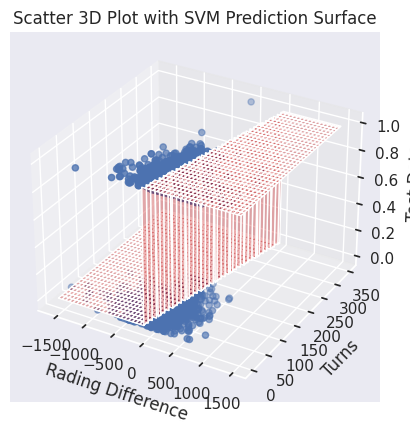

In [71]:
##### Code block for Graduate Student Question - Figure 1 Linear
Plot_3D(X, Xm_test, ym_test, svm_lin2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


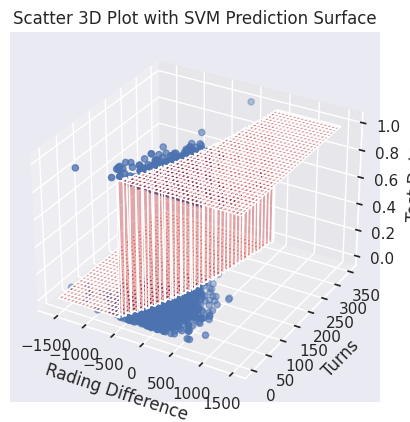

In [72]:
##### Code block for Graduate Student Question - Figure 2 Poly
Plot_3D(X, Xm_test, ym_test, svm_poly2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


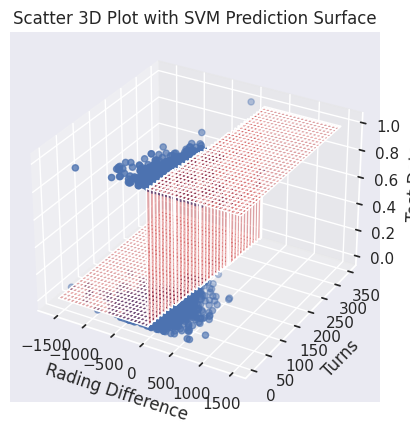

In [73]:
##### Code block for Graduate Student Question - Figure 3 Rbf
Plot_3D(X, Xm_test, ym_test, svm_rbf2)